# Proyecto 4: Clasificación de señales ECG

### David Alejandro Henao - Maria Camila Bravo

### 1. Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

### Hacer un resumen de la sección extracción de caracteríticas (Features extraction) y discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad (10%)

Los métodos tradicionales, como las redes neuronales y las transformadas de Fourier o wavelets, aunque útiles, enfrentan limitaciones al intentar preservar la información temporal esencial y son poco interpretables. Estos enfoques resultan ineficaces para realizar clasificaciones precisas en patologías como la fibrilación auricular (AFIB), donde se presentan distorsiones o la ausencia de ondas clave en el ECG, como la onda P. En vista de que la demanda de diagnósticos automáticos de alta precisión para afecciones cardíacas ,la política de salud pública de implementar procedimientos de cribado más amplios y la adopción de dispositivos portátiles habilitados para ECG ha aumentado, el estudio presenta un nuevo método de extracción de características de ECG. Este método, al igual que otros, deben tener en cuenta la variabilidad interpersonal e intrapersonal de las señales ECG, la distorsión por ruido y la ausencia de ondas o segmentos en muchos casos de arritmia.

Este nuevo método para la extracción de características en señales ECG se enfoca en analizar cómo se distribuyen y se relacionan ciertos atributos de las ondas en una señal de ECG, en términos tanto de su forma (morfología) como de su comportamiento en el tiempo Este enfoque permite capturar patrones específicos que no dependen únicamente de la presencia de ondas tradicionales, como la onda P, lo cual es crucial cuando estas ondas están ausentes o distorsionadas, como en el caso de la fibrilación auricular. Además, el proceso de normalización de las señales, junto con la incorporación de factores demográficos como edad y género, permite mejorar la comparabilidad de las señales entre individuos y reducir la variabilidad intrapersonal e interpersonal. Esto aumenta la precisión y robustez del análisis, especialmente en la clasificación de arritmias con señales afectadas por distorsiones o la falta de ondas clave. La integración con algoritmos avanzados como Gradient Boosting Trees mejora aún más la capacidad de clasificación, permitiendo obtener resultados altamente precisos que son comparables a los obtenidos por cardiólogos, incluso en casos complicados de arritmias.

### **Discusión sobre la ausencia de ondas en el complejo PQRS:**

Cuando desaparecen ciertas ondas del complejo PQRS en el ECG debido a enfermedades, el análisis de la señal se enfrenta a una pérdida de información crucial que complica la interpretación y clasificación de las arritmias. Las estrategias para abordar este desafío se basan en la extracción de características alternativas y métodos analíticos que aprovechan la información restante en la señal. A continuación, se amplían los enfoques previamente descritos:

ESTRATEGIAS DE MANEJO:

* Análisis de intervalos RR: Los intervalos RR se calculan como el tiempo entre picos R consecutivos, proporcionando información sobre el ritmo cardíaco y su regularidad. En arritmias como la fibrilación auricular (AFIB), donde las ondas P están ausentes o reemplazadas por ondas de fibrilación, la irregularidad de los intervalos RR es un indicador clave. Este método permite caracterizar ritmos rápidos, lentos e irregulares sin depender de las ondas ausentes.

* Transformada de Fourier y Wavelet: Estas herramientas analizan la señal en el dominio de la frecuencia, ayudando a identificar patrones anómalos asociados con arritmias. La Transformada Wavelet, en particular, permite retener parte de la información temporal, útil para identificar alteraciones en la dinámica de la señal.

* Modelos de Machine Learning: Algoritmos de aprendizaje automático pueden manejar datos incompletos ajustándose dinámicamente a la ausencia de componentes. El uso de características derivadas, como las relaciones entre amplitudes y tiempos de los picos restantes, puede aumentar la precisión del modelo.

* Morfología, duración y patrón del complejo QRS: El análisis del QRS es fundamental cuando las ondas P o T no son detectables. Las duraciones prolongadas del QRS pueden señalar bloqueos de rama derecha o izquierda, mientras que cambios en su morfología pueden indicar arritmias ventriculares [1]. Este enfoque es efectivo porque el QRS se mantiene presente en la mayoría de los ECG incluso en condiciones severas[2].


Extracción de los datos

In [76]:
import pandas as pd
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\Diagnostics.xlsx"
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"

dataframe = pd.read_excel(ruta)
df_filtrado= dataframe[(dataframe['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado = df_filtrado[['FileName','Rhythm']]
df_filtrado.head()

FileName Rhythm
0  MUSE_20180113_171327_27000   AFIB
1  MUSE_20180112_073319_29000     SB
2  MUSE_20180113_121940_44000     SB
3  MUSE_20180112_120347_79000     SB
4  MUSE_20180114_075026_69000   AFIB

### 2. Selección de base de datos.

La base de datos seleccionada, fue la del **proyecto 2** por su procesamiento de señales de nivel profesional y su validación en investigaciones anteriores. Es altamente probable que el proceso de filtrado implementado por los autores sea más eficiente y robusto, incorporando técnicas más avanzadas que las utilizadas en el Proyecto 3. Asimismo, la aplicación de la transformada wavelet en el proyecto anterior, estuvo basada en las busquedas bibliograficas que hicimos y puede no estar adaptada a las características particulares de la base de datos, derivando en una selección poco óptima de características para el entrenamiento de modelos predictivos, afectando la calidad de los resultados. Además, tenemos mayor experiencia con la transformada rápida de Fourier, herramienta que utilizamos en el Proyecto 2 y que nos permite trabajar de manera más eficiente y efectiva con las señales.

Para efectos prácticos en este proyecto decidimos guardar los datos corregidos del proyecto 2 en un archivo .csv, dicho archivo contiene la FMP y el nFSB debidamente procesadas. El archivo se adjuntará en el github

In [77]:
import pandas as pd
datosP4 = pd.read_csv('datosp2.csv', header=0, index_col=0)
# Eliminamos la columna 'NFrecuencias'
datosP4 = datosP4.drop(columns=['NFrecuencias'])
datosP4 = datosP4.rename(columns={'MFrecuencia': 'FMP'})
datosP4.reset_index()

index patologia   FMP
0     MUSE_20180111_155154_74000      AFIB   9.7
1     MUSE_20180111_155203_15000      AFIB   2.7
2     MUSE_20180111_155758_17000        SB   3.7
3     MUSE_20180111_155839_67000        SB   2.9
4     MUSE_20180111_155859_36000        SB   2.8
...                          ...       ...   ...
5664  MUSE_20180712_161449_58000      AFIB  12.4
5665  MUSE_20180712_161451_72000      AFIB   3.9
5666  MUSE_20180712_161452_78000      AFIB   3.2
5667  MUSE_20180712_161503_00000      AFIB   4.1
5668  MUSE_20180712_161505_16000      AFIB   2.6

[5669 rows x 3 columns]

### 3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

### **PASO1 Instalación**
Para usar usar la herramienta es necesario instalar la libreria neurokit2. Para ello usamos la siguiente linea de código:

In [78]:
!pip install neurokit2

Defaulting to user installation because normal site-packages is not writeable


### **PASO2 Librerias**
Una vez instalada la libreria importamos las demás librerias necesarias para su correecto uso:

In [79]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

### **PASO3 Señal**
**Carga de la señal**

Ahora que tenemos las librerias que necesitamos podemos cargar una señal ECG con la que hayamos trabajado. Tambien es posible generar señales sintéticas o traer bases de datos propias de la libreria.

Por ejemplo con las siguientes lineas de código permite exportar datos de ekg en reposo que pueden usar usados para análisis.

In [80]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows


ECG       PPG       RSP
0  0.003766 -0.102539  0.494652
1 -0.017466 -0.103760  0.502483
2 -0.015679 -0.107422  0.511102
3 -0.001598 -0.110855  0.518791
4  0.002483 -0.112610  0.528669

Con las siguientes lineas podemos generar una señal sintética, a la que se le controle la duración, la frecuencia de muestreo, el ritmo cardíaco, etc:

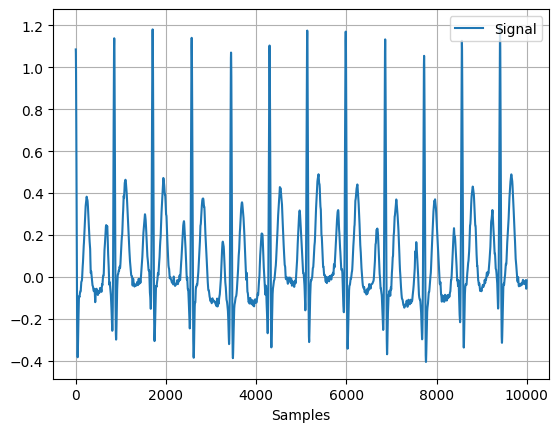

In [81]:
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=1000, noise=0.03,heart_rate=70)
nk.signal_plot(ecg_signal, subplots=False)
plt.grid()
plt.show()

Igualmente essto es meramente informativo, trabajaremos con una señal de ejemplo extraida de la base de datos dada

      II
0  78.08
1  58.56
2  48.80
3  43.92
4  43.92


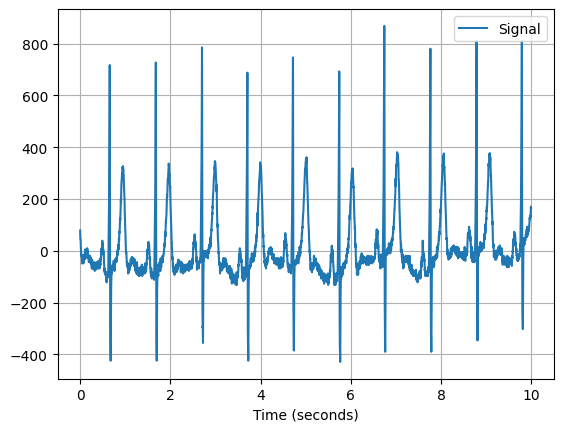

In [82]:

# Cargar los datos desde el archivo CSV
#datos = pd.read_csv('c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised\\MUSE_20180112_122550_52000.csv', delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos = pd.read_csv('/Users/mcamilabravo/Downloads/Biosenales_20242-Derivacion_II_Filtrado/Proyecto4/Señales_Seleccionadas/MUSE_20180112_122550_52000_derivacion_II.csv', delimiter=',')

# Verifica las primeras filas del archivo
print(datos.head())

# Graficar la señal de la derivación II
nk.signal_plot(datos['II'], sampling_rate=500)
plt.grid()
plt.show()


### **PASO4 Procesamiento**

**Procesamos la señal**

La función ecg_process simplifica el análisis de señales ECG al realizar múltiples pasos de preprocesamiento y análisis de manera automática. Esta herramienta es ideal para obtener rápidamente información relevante sobre una señal ECG sin necesidad de implementar manualmente cada etapa.

In [83]:
signal_ekg = datos['II'].values
signals, info = nk.ecg_process(signal_ekg, sampling_rate=500,method='neurokit')
df = pd.json_normalize(info)
df_info = df.T
df_info

0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [325, 836, 1348, 1851, 2357, 2870, 3369, 3880,...
ECG_R_Peaks_Uncorrected  [325, 836, 1348, 1851, 2357, 2870, 3369, 3880,...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.0153333333333334, 1.022, 1.024, 1.006, 1.01...
ECG_fixpeaks_drrs        [-0.029353362686696208, 0.15540015540015367, 0...
ECG_fixpeaks_mrrs        [-0.15860428231562676, 0.1586042823156215, 0.1...
ECG_fixpeaks_s12         [0.15540015540015367, 0.04662004662004662, 0.1...
ECG_fixpeaks_s22         [0.15540015540015367, -0.41958041958041953, -0...
ECG_fixpeaks_c1                                                       0.13
ECG_fixpeaks_c2                                                       0.17
sampling_rate                                                          500
ECG_P_Peaks              [246, 756, 1268, 1772, 2276, 2791, 3291, 3801,...
ECG_P_Onsets             [218, 728, 1240, 1743, 2248, 2758, 3263, 3771,...
ECG_P_Offsets            [275, 786, 1297, 1800, 2306, 2819, 3318, 3828,...
ECG_Q_Peaks              [294, 813, 1301, 1819, 2330, 2832, 3340, 3847,...
ECG_R_Onsets             [251, 757, 1277, 1777, 2277, 2797, 3295, 3807,...
ECG_R_Offsets            [352, 863, 1375, 1878, 2384, 2897, 3396, 3907,...
ECG_S_Peaks              [339, 850, 1362, 1864, 2370, 2883, 3383, 3894,...
ECG_T_Peaks              [472, 982, 1494, 1997, 2503, 3016, 3516, 4027,...
ECG_T_Onsets             [431, 939, 1450, 1957, 2459, 2973, 3474, 3984,...
ECG_T_Offsets            [514, 1026, 1540, 2041, 2550, 3063, 3558, 4071...

### **PASO5**
**5.1 Visualización y extracción de caracteristicas**

Dentro del NeuroKit hay diferentes funciones para procesar las señales ECG y extraer características importantes de ellas, en los ejemplos mostrados en la página vemos que permite: Análisis de la variabilidad de frecuencia cardíaca VFC, extracción y visualización de latidos individuales del corazón, localiazación de las ondas P, Q, R, S y T en el EKG, etc.  Se suele hacer un procesamiento básico que incluye detección de los picos P,Q,R y demás,  y la extracción de intervalos RR, el cual realizaremos en este minitutorial.

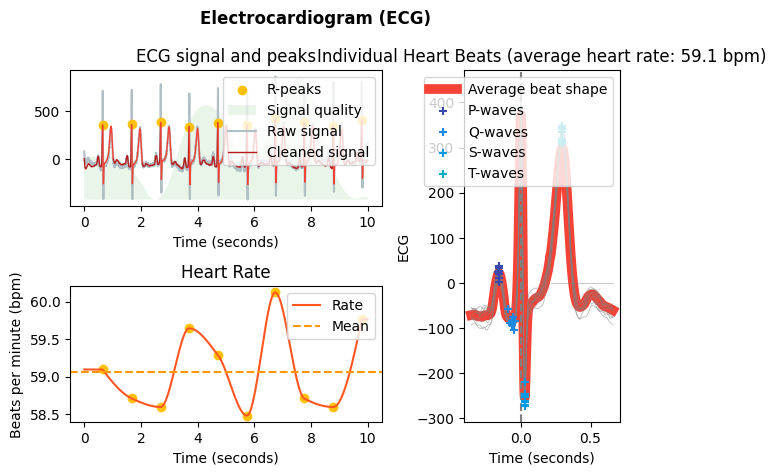

In [84]:
#Con la función ecg_plot() puedes realizar la visualización de la señal y otras características
# resultantes de la función ecg_process()
nk.ecg_plot(signals, info)
plt.tight_layout()

### **5.2 Picos R**

El método nk.events_plot sirve para visualizar cualquier evento detectado, como los picos R o cualquier otro marcador de la señal ECG.

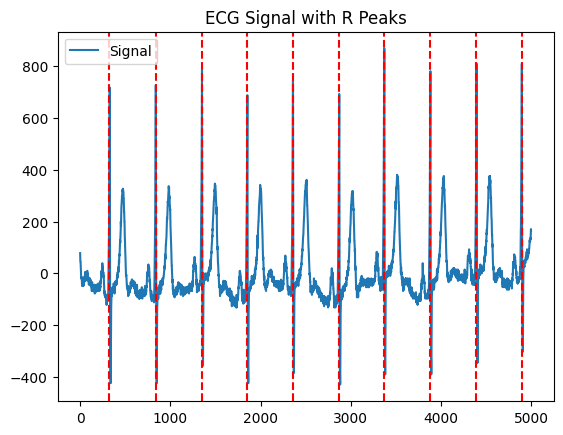

In [85]:
rpeaks = info['ECG_R_Peaks']  # Extraer las posiciones de los picos R
nk.events_plot(rpeaks, signal_ekg)
plt.title("ECG Signal with R Peaks")
plt.show()

### **5.3 Detección de los picos P,Q,S y T**

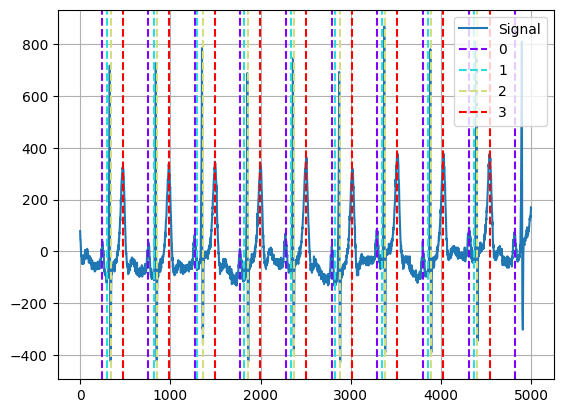

In [86]:
_, rpeaks = nk.ecg_peaks(signal_ekg, sampling_rate=500)
signals, waves = nk.ecg_delineate(signal_ekg, rpeaks, sampling_rate=500)
nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],waves["ECG_S_Peaks"],waves["ECG_T_Peaks"]], signal_ekg)
plt.grid()

### **5.4 Segmanetación de las fases del ciclo cardíaco**

(      ECG_P_Peaks  ECG_Q_Peaks  ECG_S_Peaks  ECG_T_Peaks  ECG_P_Onsets  \
 0               0            0            0            0             0   
 1               0            0            0            0             0   
 2               0            0            0            0             0   
 3               0            0            0            0             0   
 4               0            0            0            0             0   
 ...           ...          ...          ...          ...           ...   
 4995            0            0            0            0             0   
 4996            0            0            0            0             0   
 4997            0            0            0            0             0   
 4998            0            0            0            0             0   
 4999            0            0            0            0             0   
 
       ECG_T_Offsets  
 0                 0  
 1                 0  
 2                 0  
 3    

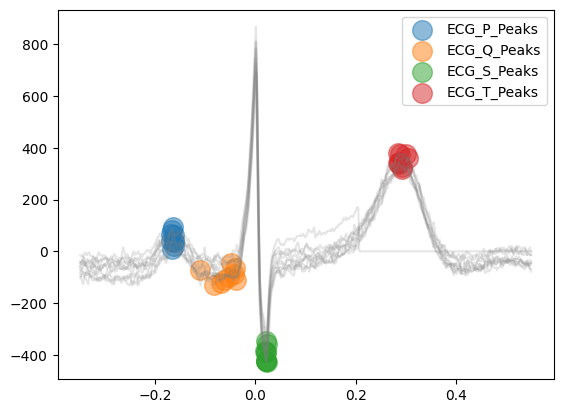

In [87]:
#clean_signal = signals["ECG_Clean"]
delineated = nk.ecg_delineate(signal_ekg, sampling_rate=500, method="peak")

nk.ecg_delineate(signal_ekg,rpeaks, sampling_rate=500,  method="peak", show=True,show_type='peaks')

### **6 EXTRA** 
**Variabilidad de la frecuencia cardíaca (VFC)**



In [88]:
#ecg_signal = pd.read_csv("Señales_Seleccionadas\MUSE_20180112_122550_52000_derivacion_II.csv")
ecg_signal =pd.read_csv('/Users/mcamilabravo/Downloads/Biosenales_20242-Derivacion_II_Filtrado/Proyecto4/Señales_Seleccionadas/MUSE_20180112_122550_52000_derivacion_II.csv')
ecg_signal=ecg_signal.values.flatten()
ecg_limpia = nk.ecg_clean(ecg_signal, sampling_rate=100)

/Users/mcamilabravo/Library/Python/3.9/lib/python/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


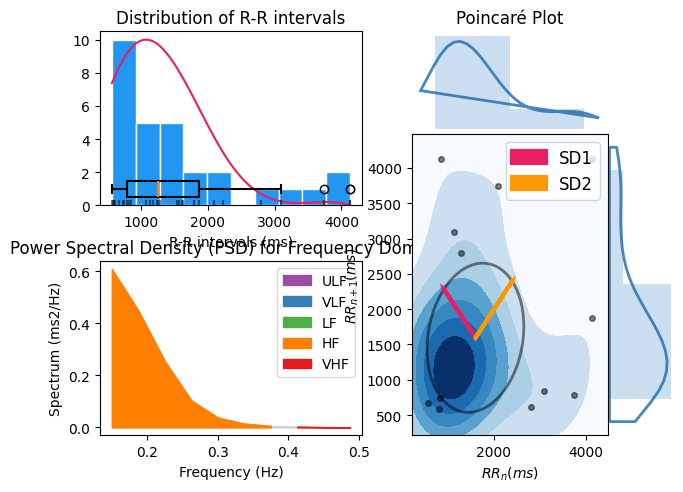

In [89]:
peaks, info = nk.ecg_peaks(ecg_limpia, sampling_rate=100, correct_artifacts=True)
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
#print(info)

El Poincaré plot es una representación gráfica que sirve para analizar la variabilidad de la frecuencia cardíaca (HRV) desde una perspectiva no lineal. Es especialmente útil para evaluar la dinámica de los intervalos RR y obtener métricas adicionales relacionadas con la dispersión de los datos.

Interpretación del Poincaré Plot:
1) **Ejes del gráfico:**

* Eje x: RR_n que representa el intervalo RR actual 
* Eje y: RR_n+1, que representa el intervalo RR siguiente

Cada punto en el gráfico corresponde a un par de intervalos consecutivos 

2) **Distribución de los puntos:**

* Agrupación de puntos cercanos a la diagonal: Indica regularidad o consistencia en los intervalos RR, lo que refleja una actividad cardíaca estable.
* Dispersión de los puntos: Una mayor dispersión refleja mayor variabilidad de los intervalos RR, lo que puede estar asociado con una mejor regulación autonómica del corazón.

3) **Elipses y parámetros SD1/SD2:**

* SD1 (desviación estándar perpendicular a la diagonal): Representa la variabilidad a corto plazo de los intervalos RR. Asociada con la actividad parasimpática.
* SD2 (desviación estándar a lo largo de la diagonal): Representa la variabilidad a largo plazo de los intervalos RR. Asociada con la actividad simpática y parasimpática combinadas.
* Relación SD1/SD2: Da una idea de la predominancia relativa de las actividades simpática y parasimpática.

### **4. Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3 (5%).**

Para este numeral hemos decidido usar las 10 señales que usabamos en el proyecto 3 para aplicar los diferentes flujos. Estas señales estarán adjuntas en el github y están guardadas en la carpeta Señales_Seleccionadas cada una como csv. Aplicaremos el minitutorial a dichas señales exceptuando el paso 6, porque este requeria un ancho de ventana mucho mayor, que en algunas señales era incompatibe y nos generaba errores.

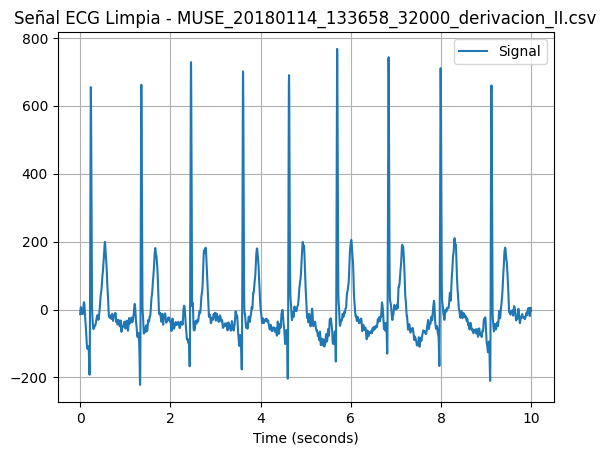

Información del procesamiento para MUSE_20180114_133658_32000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks                [679, 1229, 1806, 2328, 2850, 3420, 3997, 4560]
ECG_R_Peaks_Uncorrected    [679, 1229, 1806, 2316, 2850, 3420, 3997, 4560]
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.108857142857143, 1.1, 1.154, 1.044, 1.044, ...
ECG_fixpeaks_drrs        [0.01645413410119275, -0.05950911833264821, 0....
ECG_fixpeaks_mrrs  

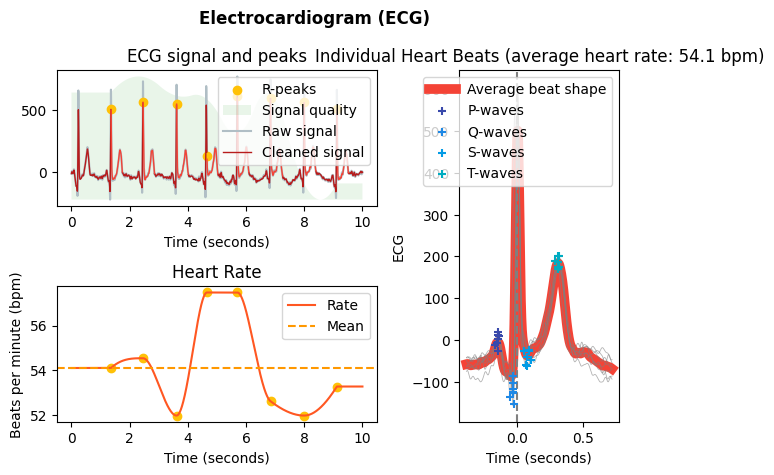

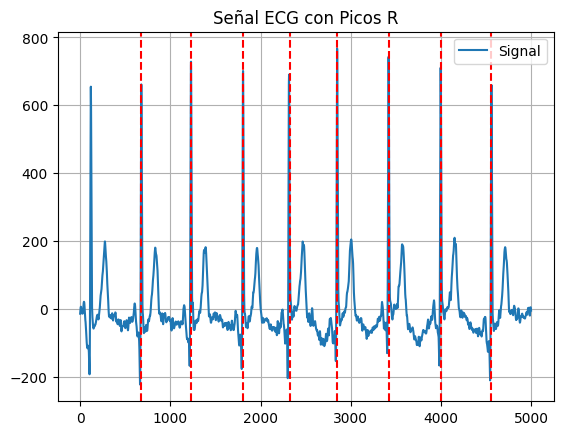

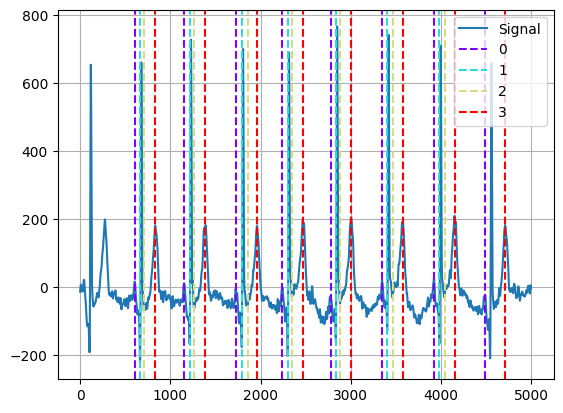

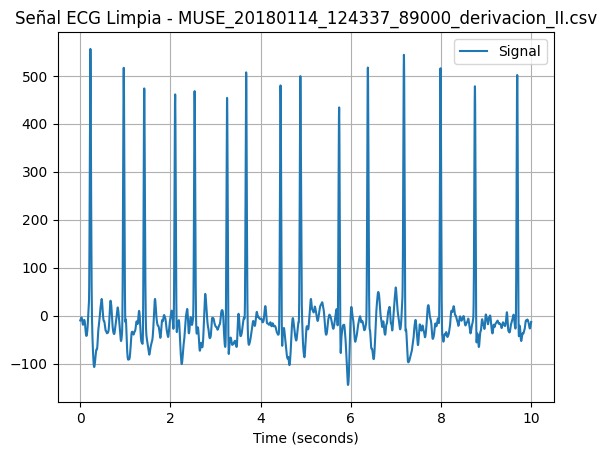

Información del procesamiento para MUSE_20180114_124337_89000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [482, 710, 1052, 1268, 1628, 1839, 2220, 2440,...
ECG_R_Peaks_Uncorrected  [482, 710, 1052, 1268, 1628, 1839, 2220, 2440,...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [0.6710769230769231, 0.456, 0.684, 0.432, 0.72...
ECG_fixpeaks_drrs        [0.03197219616739057, -0.33490645138107, 0.355...
ECG_fixpeaks_mrrs  

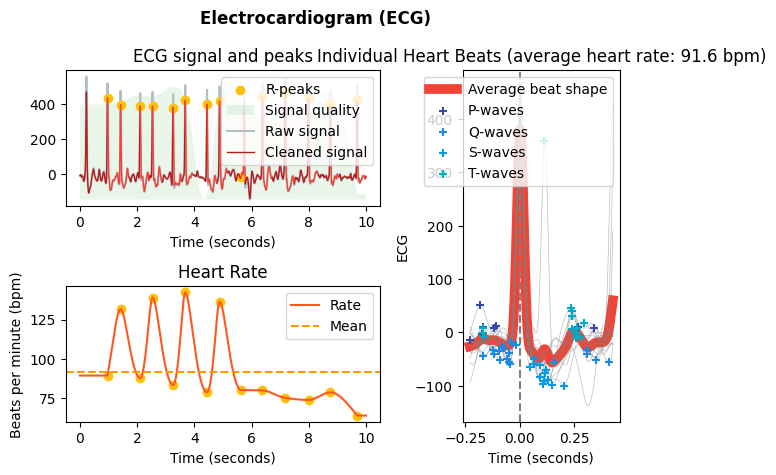

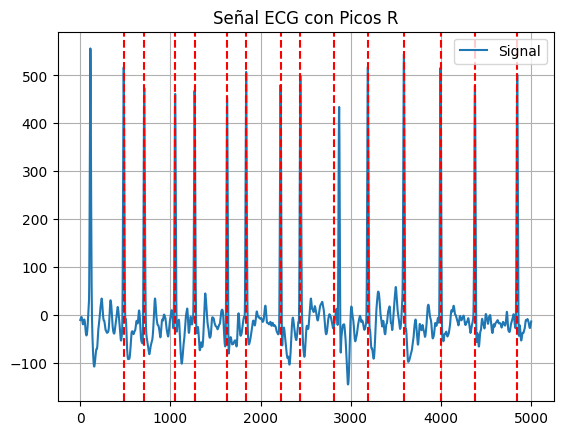

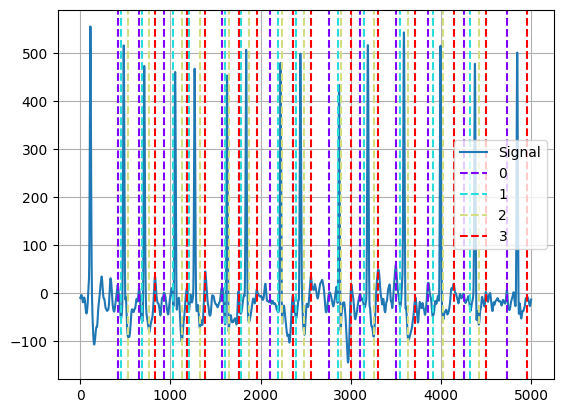

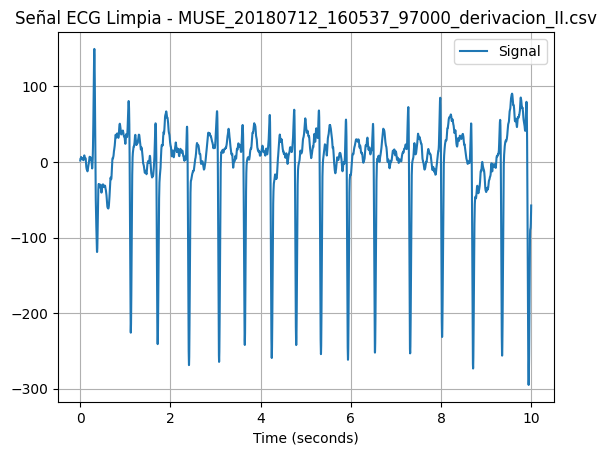

Información del procesamiento para MUSE_20180712_160537_97000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [155, 535, 834, 1182, 1515, 1799, 2099, 2370, ...
ECG_R_Peaks_Uncorrected  [155, 535, 834, 1182, 1515, 1799, 2099, 2370, ...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [0.6386666666666667, 0.76, 0.598, 0.696, 0.666...
ECG_fixpeaks_drrs        [-0.02002442002442003, 0.6666666666666655, -0....
ECG_fixpeaks_mrrs  

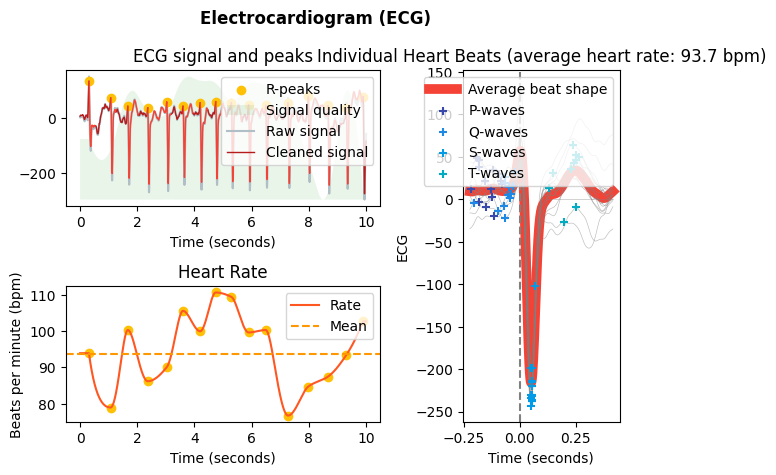

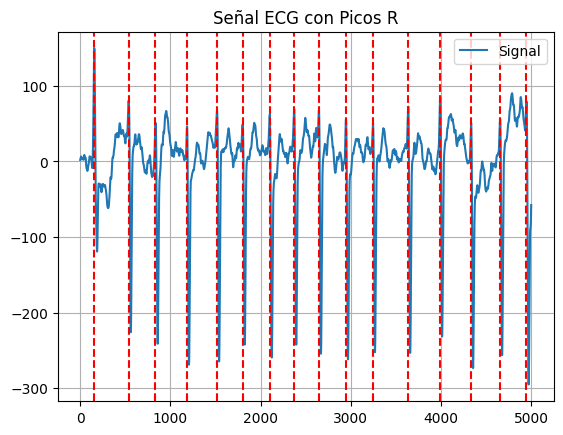

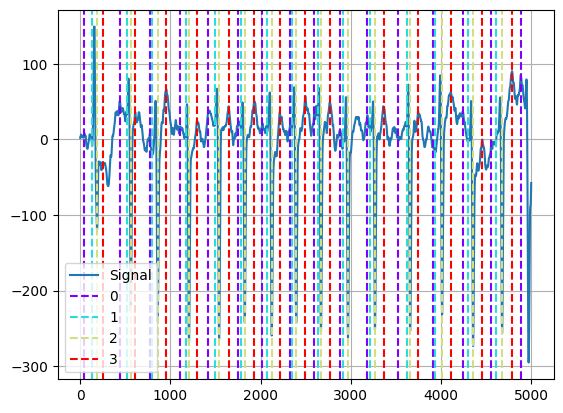

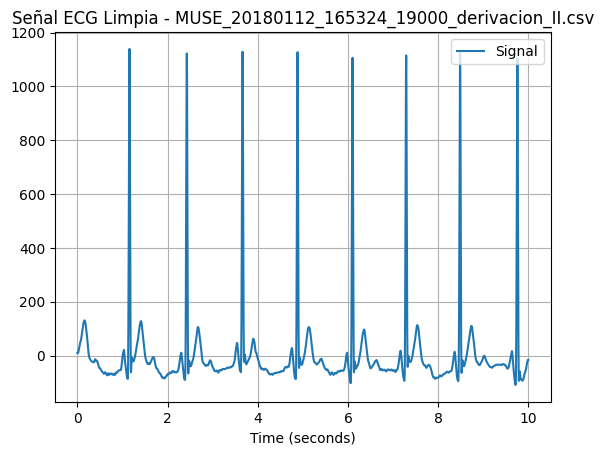

Información del procesamiento para MUSE_20180112_165324_19000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks                [577, 1213, 1831, 2441, 3050, 3645, 4243, 4878]
ECG_R_Peaks_Uncorrected    [577, 1213, 1831, 2441, 3050, 3645, 4243, 4878]
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.2288571428571426, 1.272, 1.236, 1.22, 1.218...
ECG_fixpeaks_drrs        [0.0710514629693593, 0.5215374747125886, -0.43...
ECG_fixpeaks_mrrs  

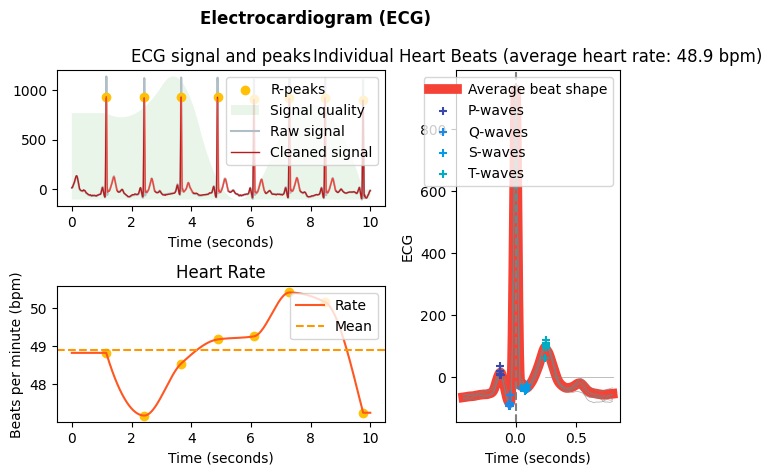

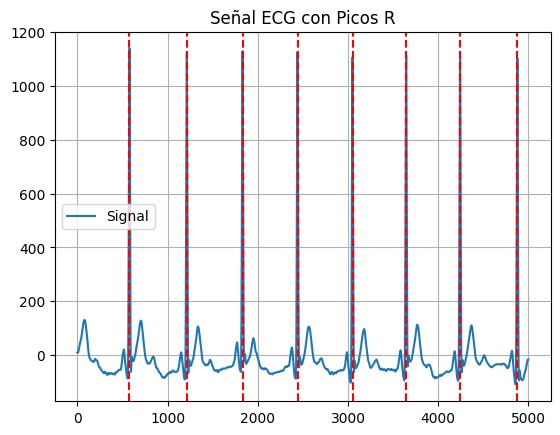

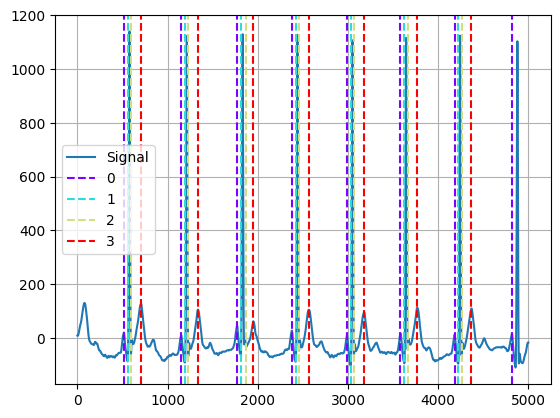

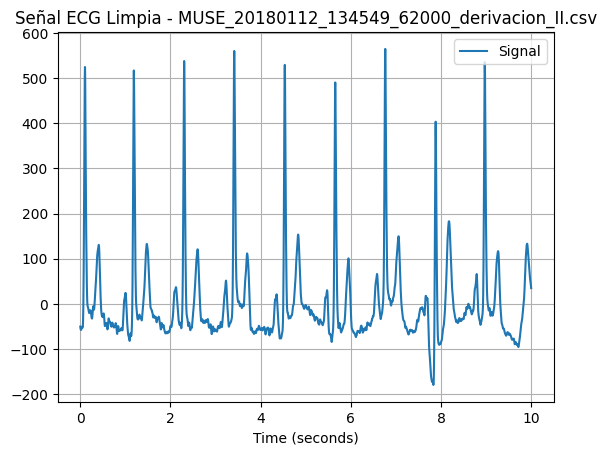

Información del procesamiento para MUSE_20180112_134549_62000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [594, 1152, 1707, 2268, 2827, 3381, 3940, 4485...
ECG_R_Peaks_Uncorrected  [594, 1152, 1707, 2268, 2827, 3381, 3940, 4485...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.08975, 1.116, 1.11, 1.122, 1.118, 1.108, 1....
ECG_fixpeaks_drrs        [-0.45488165680473086, 0.6213017751479278, -0....
ECG_fixpeaks_mrrs  

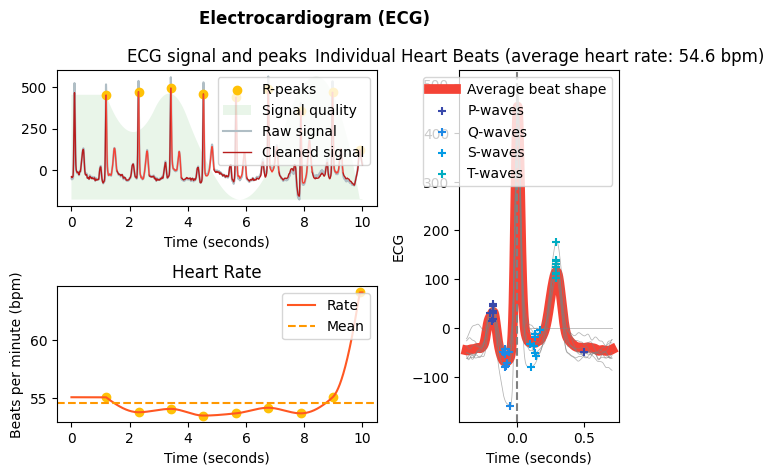

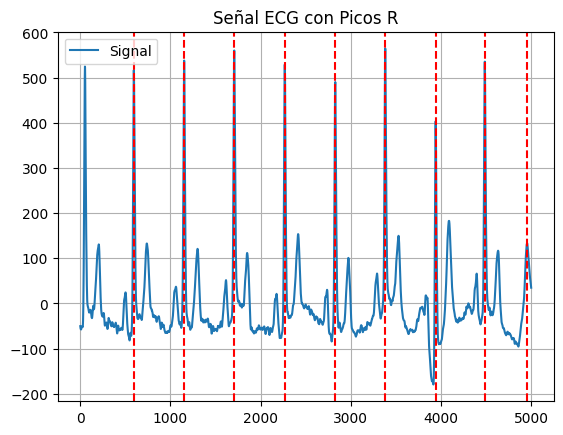

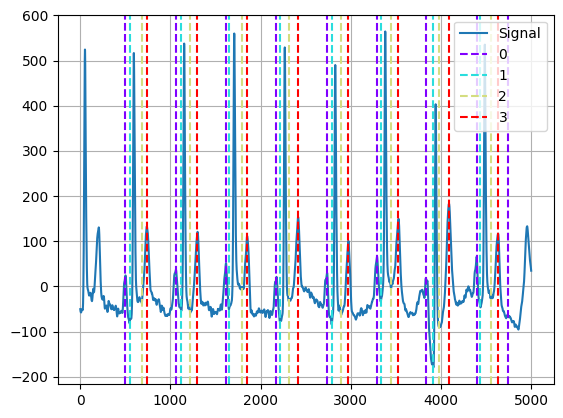

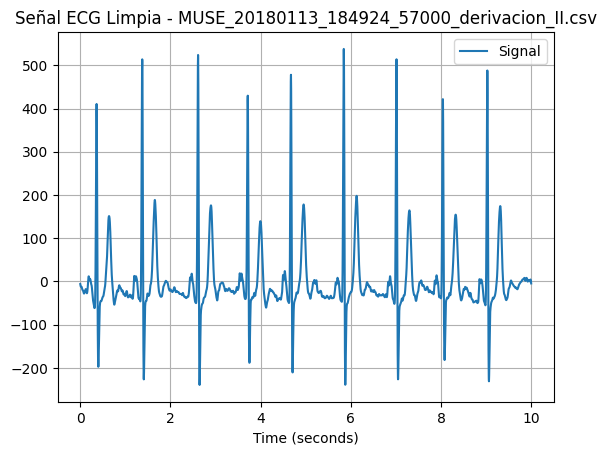

Información del procesamiento para MUSE_20180113_184924_57000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [181, 687, 1305, 1856, 2335, 2921, 3505, 4019,...
ECG_R_Peaks_Uncorrected  [181, 687, 1305, 1856, 2335, 2921, 3505, 4019,...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.083, 1.012, 1.236, 1.102, 0.958, 1.172, 1.1...
ECG_fixpeaks_drrs        [-0.043916420118343145, -0.262573964497041, 0....
ECG_fixpeaks_mrrs  

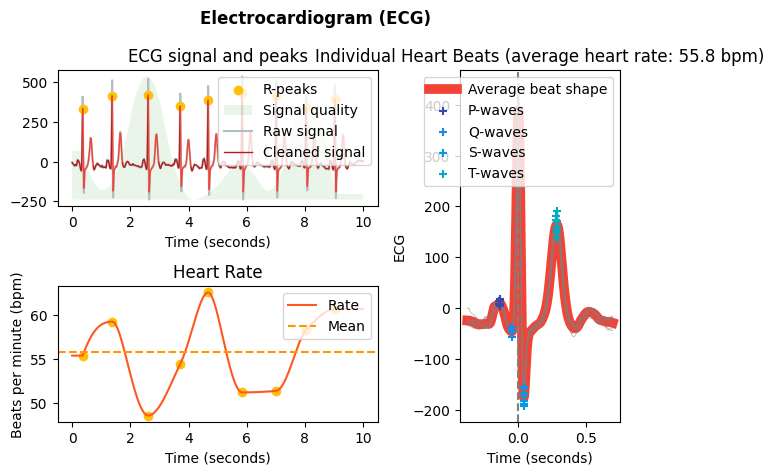

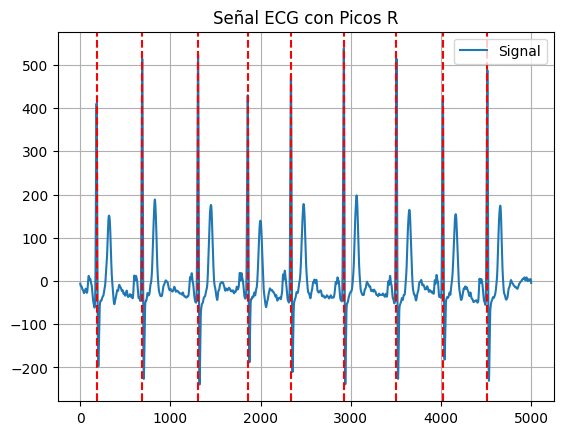

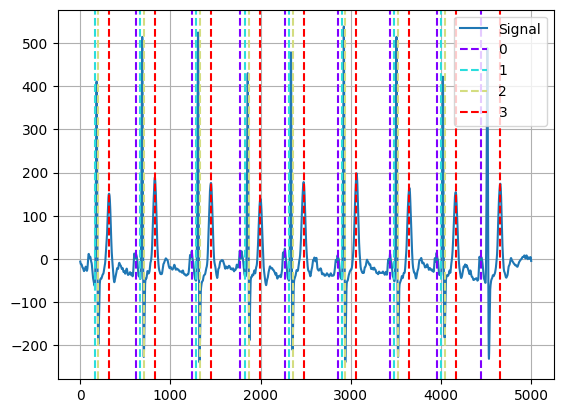

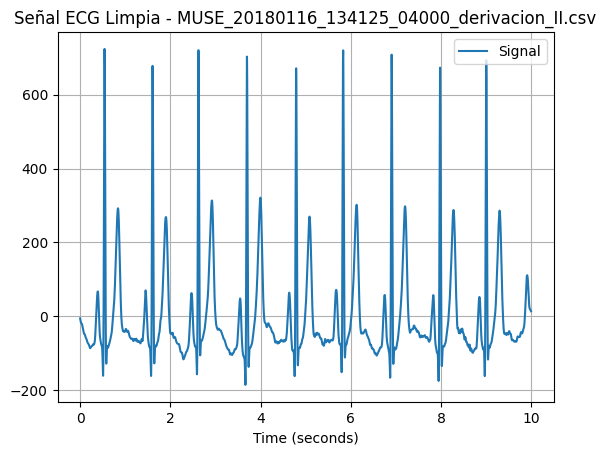

Información del procesamiento para MUSE_20180116_134125_04000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [271, 803, 1312, 1850, 2395, 2916, 3454, 3991,...
ECG_R_Peaks_Uncorrected  [271, 803, 1312, 1850, 2395, 2916, 3454, 3991,...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.0411111111111113, 1.064, 1.018, 1.076, 1.09...
ECG_fixpeaks_drrs        [-0.17755972197885622, 0.2707201682144711, -0....
ECG_fixpeaks_mrrs  

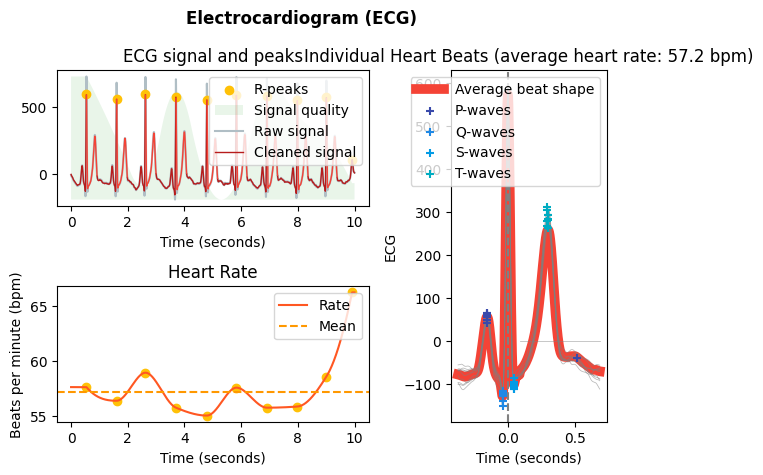

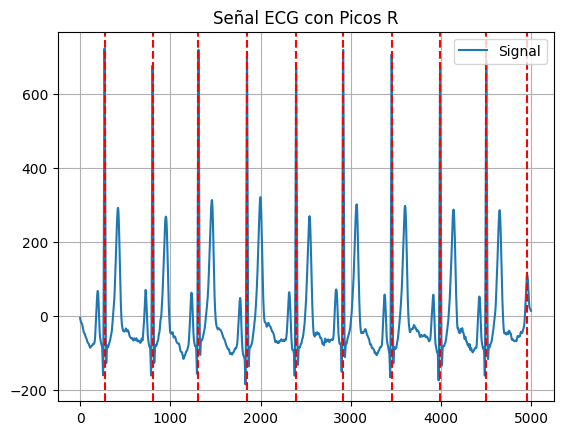

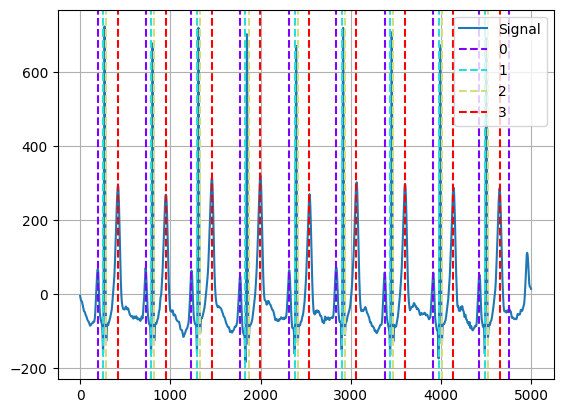

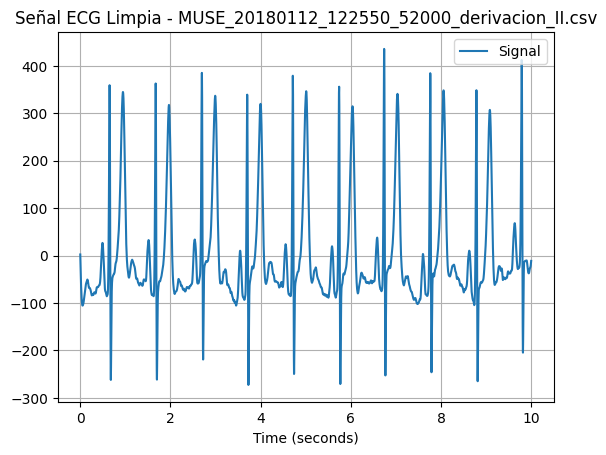

Información del procesamiento para MUSE_20180112_122550_52000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [324, 835, 1347, 1850, 2356, 2869, 3368, 3879,...
ECG_R_Peaks_Uncorrected  [324, 835, 1347, 1850, 2356, 2869, 3368, 3879,...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [1.0153333333333334, 1.022, 1.024, 1.006, 1.01...
ECG_fixpeaks_drrs        [-0.029353362686696208, 0.15540015540015367, 0...
ECG_fixpeaks_mrrs  

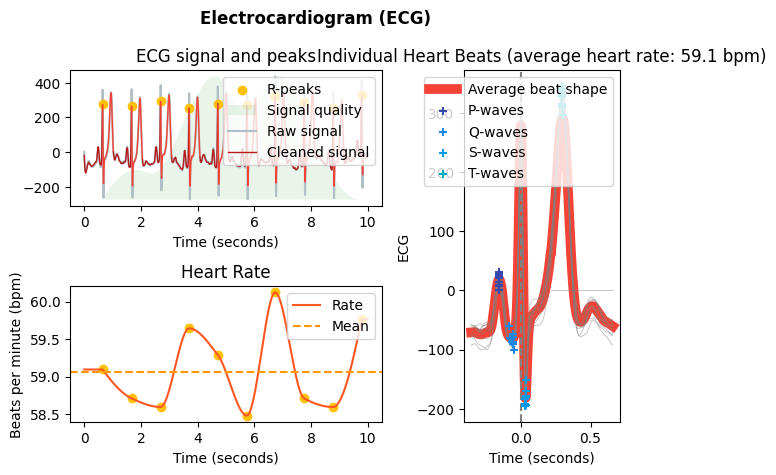

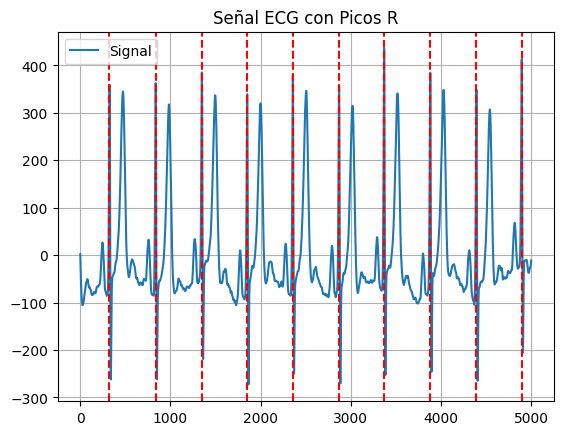

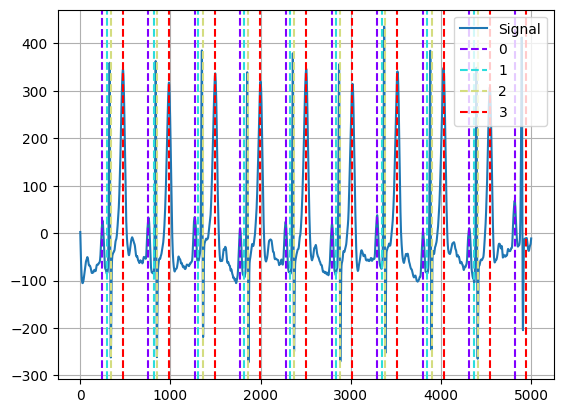

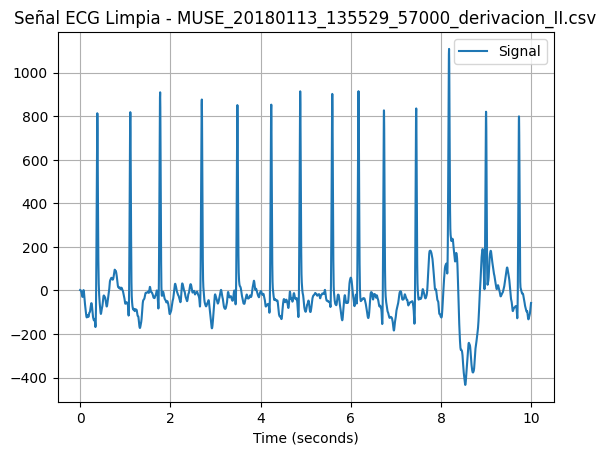

Información del procesamiento para MUSE_20180113_135529_57000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [190, 556, 886, 1348, 1743, 2118, 2440, 2795, ...
ECG_R_Peaks_Uncorrected  [190, 556, 886, 1348, 1743, 2118, 2440, 2795, ...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [0.7192307692307692, 0.732, 0.66, 0.924, 0.79,...
ECG_fixpeaks_drrs        [0.0032183464136126814, 0.049608511146972636, ...
ECG_fixpeaks_mrrs  

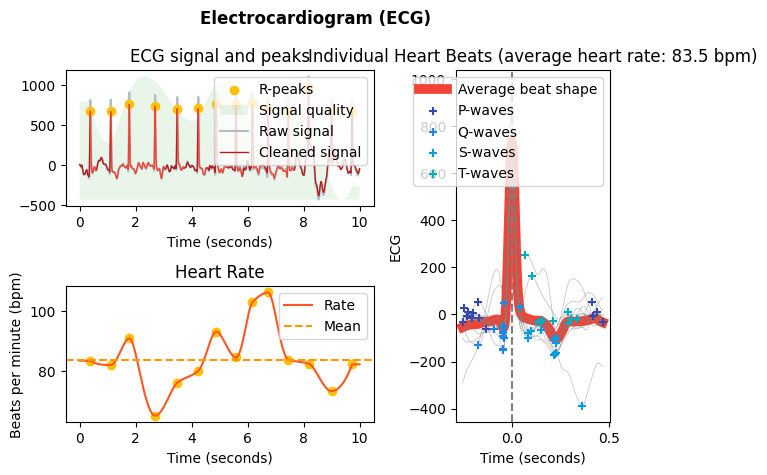

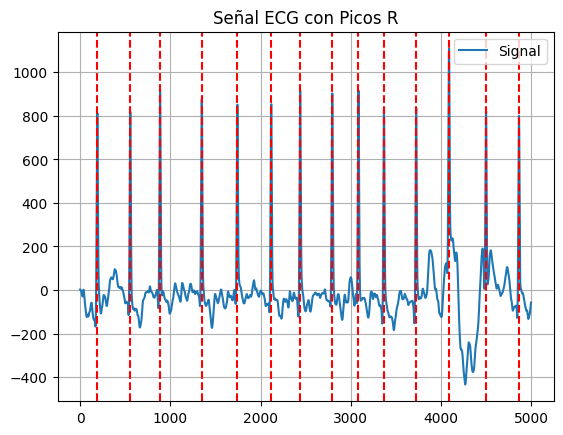

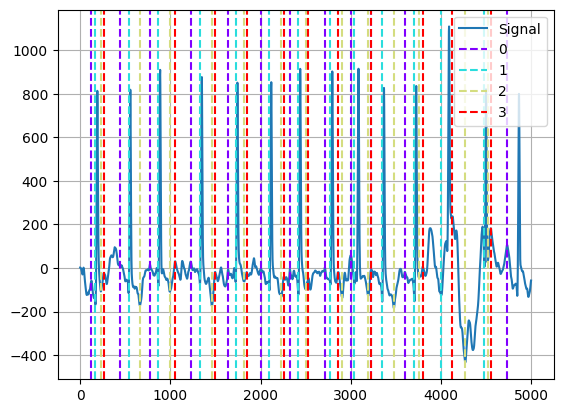

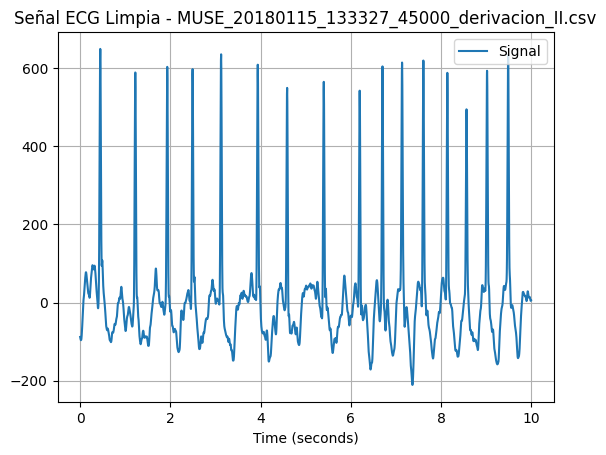

Información del procesamiento para MUSE_20180115_133327_45000_derivacion_II.csv:
                                                                         0
method_peaks                                                      neurokit
method_fixpeaks                                                       None
ECG_R_Peaks              [223, 612, 966, 1246, 1563, 1969, 2295, 2701, ...
ECG_R_Peaks_Uncorrected  [223, 612, 966, 1246, 1563, 1969, 2295, 2701, ...
ECG_fixpeaks_ectopic                                                    []
ECG_fixpeaks_missed                                                     []
ECG_fixpeaks_extra                                                      []
ECG_fixpeaks_longshort                                                  []
ECG_fixpeaks_method                                                 kubios
ECG_fixpeaks_rr          [0.6029333333333333, 0.778, 0.708, 0.56, 0.634...
ECG_fixpeaks_drrs        [-0.027789791645213318, 0.5408299866131191, -0...
ECG_fixpeaks_mrrs  

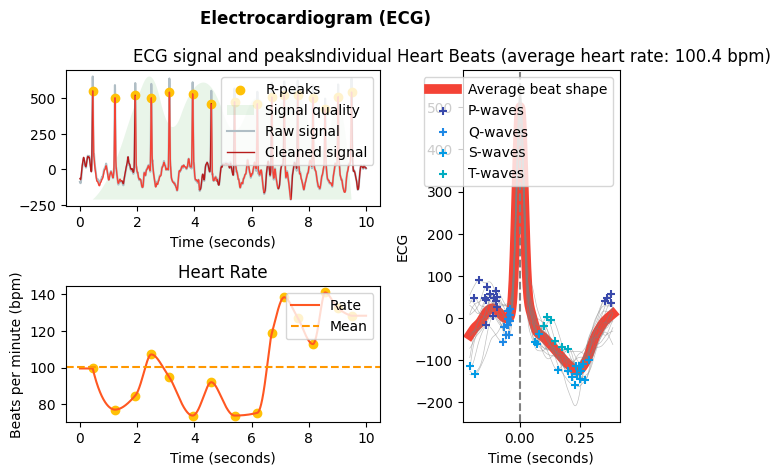

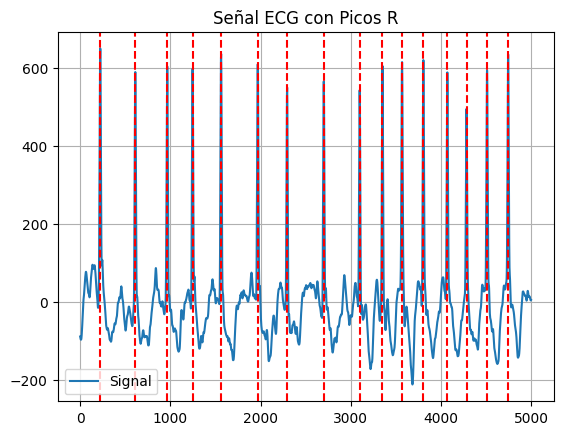

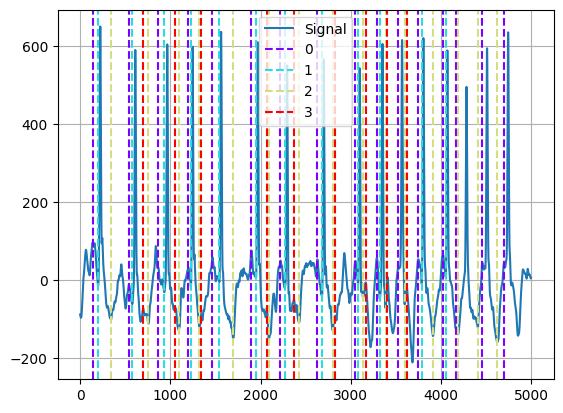

In [90]:
import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Ruta a la carpeta que contiene los archivos CSV
carpeta = "Señales_Seleccionadas"

# Obtener la lista de archivos en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith('.csv')]

# Recorrer cada archivo y procesar la señal
for archivo in archivos:
    try:
        # Leer el archivo CSV
        ruta_archivo = os.path.join(carpeta, archivo)
        ecg_signal = pd.read_csv(ruta_archivo)
        ecg_signal = ecg_signal.values.flatten()
        
        # Limpiar la señal ECG
        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=500)
        
        # Visualizar la señal limpia
        #plt.figure()
        #plt.plot(ecg_cleaned)
        #plt.title(f"Señal ECG Limpia - {archivo}")
        #plt.show()
        
        # Visualizar la señal limpia con grid
        nk.signal_plot(ecg_cleaned, sampling_rate=500)
        plt.title(f"Señal ECG Limpia - {archivo}")
        plt.grid()
        plt.show()
        
        # Procesar la señal usando nk.ecg_process
        signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=500, method='neurokit')
        
        # Normalizar y mostrar información en DataFrame
        df = pd.json_normalize(info)
        df_info = df.T
        print(f"Información del procesamiento para {archivo}:")
        print(df_info)

        # Visualizar señales procesadas
        nk.ecg_plot(signals, info)
        plt.tight_layout()
        plt.show()

        # Detección de picos R
        rpeaks = info['ECG_R_Peaks']  # Extraer las posiciones de los picos R
        nk.events_plot(rpeaks, ecg_cleaned)
        plt.title("Señal ECG con Picos R")
        plt.grid()
        plt.show()

        # Delineación de ondas ECG
        _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=500)
        signals, waves = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=500)

        # Visualizar las ondas P, Q, S y T
        nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],
                        waves["ECG_S_Peaks"], waves["ECG_T_Peaks"]], ecg_cleaned)
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"Ocurrió un error procesando {archivo}: {e}")


### 5. Con las características que extrae el neurokit y las discutidas en el punto 1 generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3 (10%). No incluir más de 15 características ni menos de 5, justificar la selección (5%).

NeuroKit2 extrae diversas características de la señal ECG al procesarla. Algunas de las características principales que puedes obtener de una señal ECG procesada con NeuroKit incluyen información sobre los picos de la señal, los intervalos RR, y varios índices de variabilidad de la frecuencia cardíaca (HRV), entre otros. Esas caracteristicas las podemos conocer con la siguiente linea de código:

In [91]:
print(info.keys())  # Muestra las claves de información extraída
# info es un diccionario con todas las caracteristicas extraidas, para verlas menor usamos lo sgte:
for i in list(info.keys()):
    print(i)

dict_keys(['method_peaks', 'method_fixpeaks', 'ECG_R_Peaks', 'ECG_R_Peaks_Uncorrected', 'ECG_fixpeaks_ectopic', 'ECG_fixpeaks_missed', 'ECG_fixpeaks_extra', 'ECG_fixpeaks_longshort', 'ECG_fixpeaks_method', 'ECG_fixpeaks_rr', 'ECG_fixpeaks_drrs', 'ECG_fixpeaks_mrrs', 'ECG_fixpeaks_s12', 'ECG_fixpeaks_s22', 'ECG_fixpeaks_c1', 'ECG_fixpeaks_c2', 'sampling_rate', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])
method_peaks
method_fixpeaks
ECG_R_Peaks
ECG_R_Peaks_Uncorrected
ECG_fixpeaks_ectopic
ECG_fixpeaks_missed
ECG_fixpeaks_extra
ECG_fixpeaks_longshort
ECG_fixpeaks_method
ECG_fixpeaks_rr
ECG_fixpeaks_drrs
ECG_fixpeaks_mrrs
ECG_fixpeaks_s12
ECG_fixpeaks_s22
ECG_fixpeaks_c1
ECG_fixpeaks_c2
sampling_rate
ECG_P_Peaks
ECG_P_Onsets
ECG_P_Offsets
ECG_Q_Peaks
ECG_R_Onsets
ECG_R_Offsets
ECG_S_Peaks
ECG_T_Peaks
ECG_T_Onsets
ECG_T_Offsets


NeuroKit extrae varios parámetros útiles que podemos relacionar con los mencionados en el artículo:

1) ECG_fixpeaks_rr (Intervalo RR):
* Relacionado con la variabilidad de la frecuencia cardíaca (HRV), fundamental para evaluar el sistema nervioso autónomo y detectar arritmias.
2) ECG_fixpeaks_drrs y ECG_fixpeaks_mrrs:
* Representan la derivada y la media de los intervalos RR.
Indicadores clave en el análisis dinámico de la frecuencia cardíaca.
3) ECG_fixpeaks_c1, ECG_fixpeaks_c2:
* Estos valores pueden representar coeficientes o características derivadas que capturan patrones más complejos de la señal. Son útiles si se utilizan en modelos de clasificación basados en machine learning.
4) ECG_R_Peaks y ECG_R_Peaks_Uncorrected:
* Identificación de los picos R. Son la base para calcular todos los intervalos derivados (RR, QT, PR) y fundamentales para localizar otros componentes del ECG.
5) ECG_fixpeaks_ectopic (Latidos ectópicos):
* Permiten identificar irregularidades en el ritmo cardíaco, como contracciones ventriculares prematuras.
6) Duración del complejo QRS (no directamente en la lista, pero derivable con NeuroKit):
* Su importancia se menciona en el artículo para evaluar bloqueos o hipertrofias.

Según el artículo, las principales características del ECG que resultan relevantes para el análisis incluyen la onda P, que representa la despolarización auricular y es clave para identificar la actividad eléctrica de las aurículas; la onda T, que refleja la repolarización ventricular y cuya morfología puede revelar anomalías en la recuperación ventricular; y el complejo QRS, que corresponde a la despolarización ventricular, siendo especialmente importante medir su duración y prominencia para evaluar bloqueos de conducción y disfunción ventricular. Además, se destacan los intervalos temporales, como el QT, PR y RR, que permiten evaluar la sincronización eléctrica entre las distintas regiones del corazón. Finalmente, la relación entre la altura y la anchura del complejo QRS se señala como un indicador útil para estudiar la eficiencia de la conducción ventricular y posibles alteraciones estructurales del corazón. Estas características constituyen elementos clave para la clasificación y el diagnóstico de patologías cardíacas.

Con esto en mente, y teniendo en cuenta que el numero de caracteristicas debe ser superior a 5 ymenor a 15, tomaremos 8 caracteriticas:

* Género
* Edad
* Número de picos R
* Número de picos P
* Altura de picos R
* FMP
* media de duración del complejo QRS
* media de los intervalos RR

#### 6. Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe:

### Inicialmente debemos traer los datos de la base de datods Diagnostics

In [92]:
#ruta_diag = 'Diagnostics.xlsx'
ruta_diag= ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
diagnostics_df = pd.read_excel(ruta_diag)


Como deseamos conservar las caracteristicas de la edad y el genero es necesario recortar el dataframe pero conservado dichas caracteristicas

In [96]:
#ruta_diag = 'Diagnostics.xlsx'
ruta_diag= ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
diagnostics_df = pd.read_excel(ruta_diag)
diagnostics_df = diagnostics_df[['FileName', 'Rhythm', 'Gender', 'PatientAge']]

Ahora traemos los datos del Proyecto 2 que contiene los FileName, la FMP y el nFSB, eliminamos la columna de nFSB, estos datos estarán el github, y son un archivo csv que contiene los datos corregidos.

In [97]:
import pandas as pd
datosP4 = pd.read_csv('datosp2.csv', header=0, index_col=0)
# Eliminamos la columna 'NFrecuencias'
datosP4 = datosP4.drop(columns=['NFrecuencias'])
#datosP4 = datosP4.rename(columns={'MFrecuencia': 'FMP'})
datosP4

patologia  MFrecuencia
MUSE_20180111_155154_74000      AFIB          9.7
MUSE_20180111_155203_15000      AFIB          2.7
MUSE_20180111_155758_17000        SB          3.7
MUSE_20180111_155839_67000        SB          2.9
MUSE_20180111_155859_36000        SB          2.8
...                              ...          ...
MUSE_20180712_161449_58000      AFIB         12.4
MUSE_20180712_161451_72000      AFIB          3.9
MUSE_20180712_161452_78000      AFIB          3.2
MUSE_20180712_161503_00000      AFIB          4.1
MUSE_20180712_161505_16000      AFIB          2.6

[5669 rows x 2 columns]

Ahora separamos por ritmos AFIB y SB

In [98]:
sbyafib_df=diagnostics_df[diagnostics_df['Rhythm'].isin(['AFIB', 'SB'])]
sbyafib_df.reset_index(drop=True)
#needed_files = sbyafib_df['FileName'].tolist()


FileName Rhythm  Gender  PatientAge
0     MUSE_20180113_171327_27000   AFIB    MALE          85
1     MUSE_20180112_073319_29000     SB  FEMALE          59
2     MUSE_20180113_121940_44000     SB    MALE          66
3     MUSE_20180112_120347_79000     SB  FEMALE          46
4     MUSE_20180114_075026_69000   AFIB  FEMALE          80
...                          ...    ...     ...         ...
5664  MUSE_20180114_134724_10000     SB  FEMALE          56
5665  MUSE_20180113_122544_20000     SB  FEMALE          38
5666  MUSE_20180114_074720_85000     SB  FEMALE          55
5667  MUSE_20180115_131524_93000   AFIB    MALE          70
5668  MUSE_20180116_133908_01000     SB    MALE          52

[5669 rows x 4 columns]

Finalmente usamos un merge par que coincidan los FileName con las respectivas FMP

In [99]:
# Unir los dataframes usando el index (FileName)
combined_df = sbyafib_df.merge(datosP4[['MFrecuencia']], left_on='FileName', right_index=True)
combined_df = combined_df.reset_index(drop = True)
combined_df

FileName Rhythm  Gender  PatientAge  MFrecuencia
0     MUSE_20180113_171327_27000   AFIB    MALE          85          9.0
1     MUSE_20180112_073319_29000     SB  FEMALE          59          2.6
2     MUSE_20180113_121940_44000     SB    MALE          66          0.9
3     MUSE_20180112_120347_79000     SB  FEMALE          46          3.8
4     MUSE_20180114_075026_69000   AFIB  FEMALE          80          4.2
...                          ...    ...     ...         ...          ...
5664  MUSE_20180114_134724_10000     SB  FEMALE          56          2.8
5665  MUSE_20180113_122544_20000     SB  FEMALE          38          0.9
5666  MUSE_20180114_074720_85000     SB  FEMALE          55         15.3
5667  MUSE_20180115_131524_93000   AFIB    MALE          70          2.6
5668  MUSE_20180116_133908_01000     SB    MALE          52          2.8

[5669 rows x 5 columns]

Ahora bien, para no trabajar con la totalidad de los datos y cumplir con la regla de la cantidad de caracteristicas hemos decidido trabahr con 1000 señales de cada ritmo; asegurando que la cantidad de datos de cada ritmo sea mayor a 10 veces la cantidad de caracteristicas, y asegurand tambien igual cantidad de datos para ritmo.

In [100]:
# Agrupar por ritmo y limitar a 1000 muestras por grupo
grouped = combined_df.groupby('Rhythm')
limited_df = grouped.head(1000)
# Mostrar el nuevo dataframe
limited_df.reset_index(drop=True)
needed_files = limited_df['FileName'].tolist()


In [ ]:
#ruta_carpeta = r'c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised'



In [102]:
import os
import pandas as pd

def leer_archivos_ecg(needed_files, ruta_carpeta):
  
    datos = {}
    
    for nombre_archivo in needed_files:
        ruta_archivo = os.path.join(ruta_carpeta, f"{nombre_archivo}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(ruta_archivo):
            # Leer el archivo CSV
            df = pd.read_csv(ruta_archivo, delimiter=',', skiprows=1, 
                             names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            # Guardar los datos de la columna 'II' en el diccionario
            datos[nombre_archivo] = df['II'].values
        else:
            print(f"Archivo {ruta_archivo} no encontrado.")
    
    return datos

datos = leer_archivos_ecg(needed_files,ruta_carpeta)


Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180113_171327_27000.csv no encontrado.
Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180112_073319_29000.csv no encontrado.
Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180113_121940_44000.csv no encontrado.
Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180112_120347_79000.csv no encontrado.
Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180114_075026_69000.csv no encontrado.
Archivo c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\ECGDataDenoised/MUSE_20180114_075128_92000.csv n

Ahora vamos a extraer las demas caracteristicas usando el neurokit. 

In [ ]:
import pandas as pd
import neurokit2 as nk
import numpy as np

def extraer_caracteristicas(diccionario_datos):

    # Lista para almacenar los resultados
    resultados = []

    for filename, señal in diccionario_datos.items():
        try:
            # Procesar la señal ECG con Neurokit
            cleaned_ecg = nk.ecg_clean(señal, sampling_rate=500)
            signals, info = nk.ecg_process(cleaned_ecg, sampling_rate=500)
            
            # Extraer características
            rpeaks = info["ECG_R_Peaks"]
            waves, delineation = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500)

            num_picos_R = len(rpeaks)
            num_picos_P = len(delineation["ECG_P_Peaks"])
            altura_picos_R = cleaned_ecg[rpeaks].mean()
            
            # Intervalo RR
    
            picosR = np.array(info['ECG_R_Peaks'])
            picosR = picosR[~np.isnan(picosR)]/info['sampling_rate']
            duracionRR = np.array([picosR[i+1]-picosR[i] for i in range(picosR.size-1)])
            mRR = np.mean(duracionRR)
            
            #duracion_qrsn
            picosQ = np.array(info['ECG_Q_Peaks'])
            picosQ = picosQ[~np.isnan(picosQ)]/info['sampling_rate']
            picosS = np.array(info['ECG_S_Peaks'])
            picosS = picosS[~np.isnan(picosS)]/info['sampling_rate']
            maxL = min(picosS.size, picosQ.size)
            duracionQRS = picosQ[:maxL] - picosS[:maxL]
            medQRS = np.mean(duracionQRS)

            # Guardar las características en un diccionario
            resultados.append({
                "FileName": filename,
                "Num_Picos_R": num_picos_R,
                "Num_Picos_P": num_picos_P,
                "Altura_Picos_R": altura_picos_R,
                "Duracion_QRS": medQRS,
                "Media_Intervalos_RR": mRR
            })
        except Exception as e:
            print(f"Error procesando {filename}: {e}")

    # Convertir la lista de resultados a un DataFrame
    return pd.DataFrame(resultados)

df_caracteristicas = extraer_caracteristicas(datos)


c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site

Error procesando MUSE_20180113_124215_52000: The data length is too small to be segmented.


c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\an

Error procesando MUSE_20180113_121039_40000: integer division or modulo by zero


c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Error procesando MUSE_20180114_124930_50000: cannot convert float NaN to integer


c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\an

In [ ]:
df_caracteristicas

FileName  Num_Picos_R  Num_Picos_P  Altura_Picos_R  \
0     MUSE_20180113_171327_27000           19           19      232.916446   
1     MUSE_20180112_073319_29000            8            8      736.005363   
2     MUSE_20180113_121940_44000            9            9      742.871831   
3     MUSE_20180112_120347_79000            9            9      566.924098   
4     MUSE_20180114_075026_69000           16           16      272.305287   
...                          ...          ...          ...             ...   
1992  MUSE_20180115_131754_32000           23           23      433.090801   
1993  MUSE_20180112_171258_74000           16           16      504.136324   
1994  MUSE_20180114_124543_93000           14           14      519.446535   
1995  MUSE_20180113_183209_79000           22           22      613.693219   
1996  MUSE_20180111_160117_84000           18           18      457.703731   

      Duracion_QRS  Media_Intervalos_RR  
0         1.850308             0.512444  
1        -0.192286             1.160571  
2        -0.160000             1.125500  
3        -0.149500             1.059750  
4         0.258923             0.626800  
...            ...                  ...  
1992      0.570941             0.415091  
1993      4.016800             0.616533  
1994      1.139000             0.666923  
1995      1.732000             0.437238  
1996      1.235000             0.497529  

[1997 rows x 6 columns]

Ahora hacemos un merge nuevamente para unir las caracteristicas para cada Filename y obtenemos el **data frame final**

In [ ]:
Full_df = pd.merge(limited_df,df_caracteristicas,left_on='FileName',right_on='FileName')
Full_df

FileName Rhythm  Gender  PatientAge  MFrecuencia  \
0     MUSE_20180113_171327_27000   AFIB    MALE          85          9.0   
1     MUSE_20180112_073319_29000     SB  FEMALE          59          2.6   
2     MUSE_20180113_121940_44000     SB    MALE          66          0.9   
3     MUSE_20180112_120347_79000     SB  FEMALE          46          3.8   
4     MUSE_20180114_075026_69000   AFIB  FEMALE          80          4.2   
...                          ...    ...     ...         ...          ...   
1992  MUSE_20180115_131754_32000   AFIB    MALE          79          3.2   
1993  MUSE_20180112_171258_74000   AFIB  FEMALE          79          1.6   
1994  MUSE_20180114_124543_93000   AFIB    MALE          81          2.5   
1995  MUSE_20180113_183209_79000   AFIB  FEMALE          65          5.0   
1996  MUSE_20180111_160117_84000   AFIB  FEMALE          83          2.4   

      Num_Picos_R  Num_Picos_P  Altura_Picos_R  Duracion_QRS  \
0              19           19      232.916446      1.850308   
1               8            8      736.005363     -0.192286   
2               9            9      742.871831     -0.160000   
3               9            9      566.924098     -0.149500   
4              16           16      272.305287      0.258923   
...           ...          ...             ...           ...   
1992           23           23      433.090801      0.570941   
1993           16           16      504.136324      4.016800   
1994           14           14      519.446535      1.139000   
1995           22           22      613.693219      1.732000   
1996           18           18      457.703731      1.235000   

      Media_Intervalos_RR  
0                0.512444  
1                1.160571  
2                1.125500  
3                1.059750  
4                0.626800  
...                   ...  
1992             0.415091  
1993             0.616533  
1994             0.666923  
1995             0.437238  
1996             0.497529  

[1997 rows x 10 columns]

In [ ]:
Full_df = Full_df.rename(columns={"FileName": "Registro", "Rhythm": "Estado", "MFrecuencia":"FMP"})
Full_df

Registro Estado  Gender  PatientAge  FMP  Num_Picos_R  \
0     MUSE_20180113_171327_27000   AFIB    MALE          85  9.0           19   
1     MUSE_20180112_073319_29000     SB  FEMALE          59  2.6            8   
2     MUSE_20180113_121940_44000     SB    MALE          66  0.9            9   
3     MUSE_20180112_120347_79000     SB  FEMALE          46  3.8            9   
4     MUSE_20180114_075026_69000   AFIB  FEMALE          80  4.2           16   
...                          ...    ...     ...         ...  ...          ...   
1992  MUSE_20180115_131754_32000   AFIB    MALE          79  3.2           23   
1993  MUSE_20180112_171258_74000   AFIB  FEMALE          79  1.6           16   
1994  MUSE_20180114_124543_93000   AFIB    MALE          81  2.5           14   
1995  MUSE_20180113_183209_79000   AFIB  FEMALE          65  5.0           22   
1996  MUSE_20180111_160117_84000   AFIB  FEMALE          83  2.4           18   

      Num_Picos_P  Altura_Picos_R  Duracion_QRS  Media_Intervalos_RR  
0              19      232.916446      1.850308             0.512444  
1               8      736.005363     -0.192286             1.160571  
2               9      742.871831     -0.160000             1.125500  
3               9      566.924098     -0.149500             1.059750  
4              16      272.305287      0.258923             0.626800  
...           ...             ...           ...                  ...  
1992           23      433.090801      0.570941             0.415091  
1993           16      504.136324      4.016800             0.616533  
1994           14      519.446535      1.139000             0.666923  
1995           22      613.693219      1.732000             0.437238  
1996           18      457.703731      1.235000             0.497529  

[1997 rows x 10 columns]

Un detalle importante es que hay 3 columnas menos, esto se debe a que ha habido problemas con algunas señales para procesarlas, ya sea porque eran muy cortas, o porque la fomra de las ondas era muy irregular y no se extrayeron las caracteristicas correctamente, o porque se generaban NaN's que limitaban el calculo a 0 o a un error cuando se hacia divisisón.

### 7. Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), de una red neuronal que permita la clasificación de las dos patologías cardiacas.

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### **Primero es necesario preparar los datos categoricos como el genero y el estado.**

 Este proceso se realiza como parte de la preparación de datos para entrenar modelos de aprendizaje automático. Convertir las categorías a valores numéricos permite que el modelo procese información que originalmente estaba en texto (como 'SB' y 'AFIB' o 'MALE' y 'FEMALE'). Además, seleccionar solo predictores relevantes y normalizar las características numéricas garantiza que todas las variables estén en la misma escala, lo que evita que aquellas con valores grandes dominen a las más pequeñas. Estos pasos ayudan a mejorar el rendimiento, la estabilidad y la precisión del modelo, haciendo que el entrenamiento sea más eficiente y los resultados más confiables.

In [ ]:
# Crear una copia del DataFrame original
Full_df_copy = Full_df.copy()
Full_df_copy['Estado'] = Full_df_copy['Estado'].map({'SB': 0, 'AFIB': 1})
Full_df_copy['Gender'] = Full_df_copy['Gender'].map({'MALE': 0, 'FEMALE': 1})
predictors = list(set(Full_df_copy.columns) - {'FileName', 'Estado'})
predictors_numericos = Full_df_copy[predictors].select_dtypes(include=['number']).columns
Full_df_copy[predictors_numericos] = Full_df_copy[predictors_numericos] / Full_df_copy[predictors_numericos].max()
#Full_df_copy.describe()
Data_final = Full_df_copy.dropna(subset=predictors_numericos)
print(f"Total pacientes antes: {Full_df_copy.shape[0]}")
print(f"Total pacientes después de eliminar NaN: {Data_final.shape[0]}")
Data_final.describe()

Total pacientes antes: 1997
Total pacientes después de eliminar NaN: 1956


Estado       Gender   PatientAge          FMP  Num_Picos_R  \
count  1956.000000  1956.000000  1956.000000  1956.000000  1956.000000   
mean      0.494888     0.382924     0.678678     0.068887     0.424829   
std       0.500102     0.486224     0.149676     0.055734     0.146364   
min       0.000000     0.000000     0.134021     0.002000     0.206897   
25%       0.000000     0.000000     0.587629     0.034000     0.310345   
50%       0.000000     0.000000     0.690722     0.058000     0.344828   
75%       1.000000     1.000000     0.793814     0.082000     0.517241   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Num_Picos_P  Altura_Picos_R  Duracion_QRS  Media_Intervalos_RR  
count  1956.000000     1956.000000   1956.000000          1956.000000  
mean      0.424829        0.207557      0.091177             0.497277  
std       0.146364        0.111651      0.167678             0.141791  
min       0.206897       -0.009650     -0.846855             0.193200  
25%       0.310345        0.126233     -0.015346             0.368329  
50%       0.344828        0.193667     -0.009221             0.540016  
75%       0.517241        0.274678      0.159275             0.612917  
max       1.000000        0.702961      1.000000             1.000000

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Entrenando Modelo 1 (2 capas de 32 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.94      0.96      0.95       691
        AFIB       0.96      0.94      0.95       678

    accuracy                           0.95      1369
   macro avg       0.95      0.95      0.95      1369
weighted avg       0.95      0.95      0.95      1369


Validación (Prueba):
              precision    recall  f1-score   support

          SB       0.95      0.96      0.95       297
        AFIB       0.96      0.95      0.95       290

    accuracy                           0.95       587
   macro avg       0.95      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587


=== Entrenando Modelo 2 (3 capas de 16 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.95      0.96      0.95       691
        AFIB       0.96      0.94      0.95       678

    accuracy          

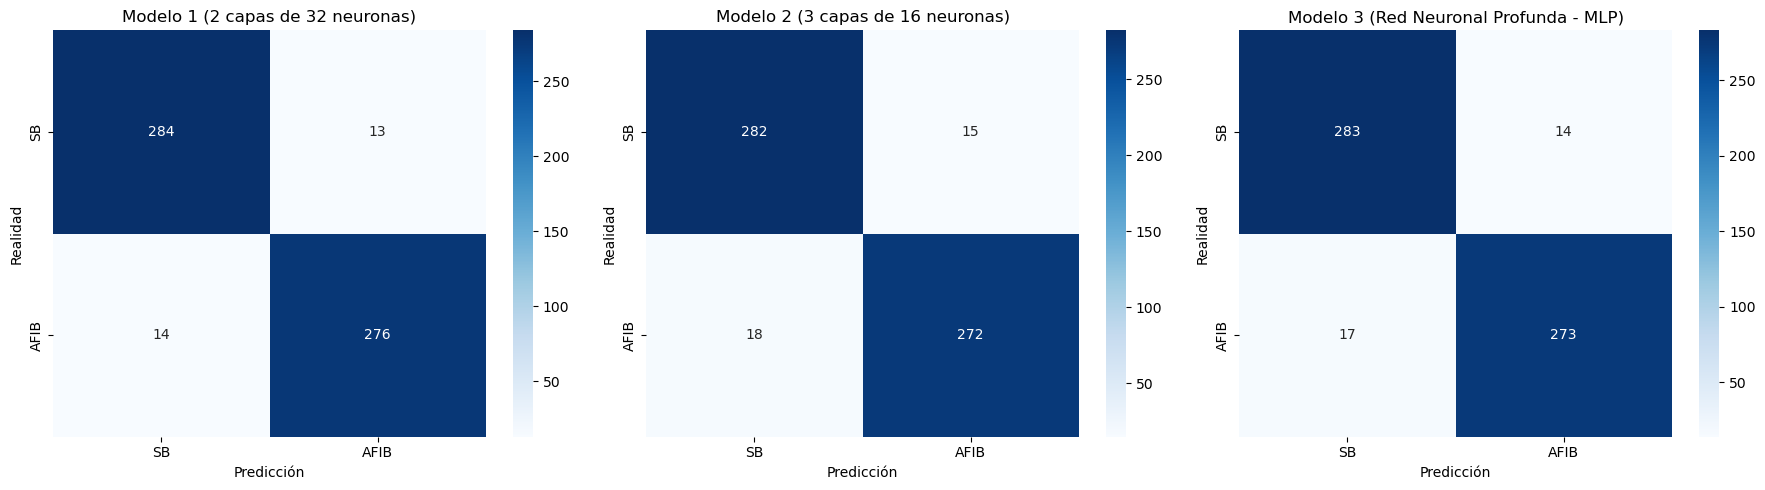

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Dividir los datos
X = Data_final[predictors_numericos].values
y = Data_final['Estado'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir los modelos
models = {
    'Modelo 1 (2 capas de 32 neuronas)': MLPClassifier(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', max_iter=1000),
    'Modelo 2 (3 capas de 16 neuronas)': MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation='tanh', solver='adam', max_iter=1000),
    'Modelo 3 (Red Neuronal Profunda - MLP)': tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='tanh', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

# Entrenar y evaluar modelos
plt.figure(figsize=(18, 5))

for i, (model_name, model) in enumerate(models.items()):
    print(f"\n=== Entrenando {model_name} ===")

    if isinstance(model, tf.keras.Sequential):
        # Modelo de TensorFlow
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predicción
        predict_train = (model.predict(X_train) > 0.5).astype(int).flatten()
        predict_test = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        # Modelo de sklearn
        model.fit(X_train, y_train)
        predict_train = model.predict(X_train)
        predict_test = model.predict(X_test)

    # Métricas
    print("Entrenamiento:")
    print(classification_report(y_train, predict_train, target_names=['SB', 'AFIB']))
    print("\nValidación (Prueba):")
    print(classification_report(y_test, predict_test, target_names=['SB', 'AFIB']))

    # Matriz de confusión
    cm = confusion_matrix(y_test, predict_test)

    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['SB', 'AFIB'], yticklabels=['SB', 'AFIB'])
    plt.title(f'{model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')

plt.tight_layout()
plt.show()


### Análisis y Discusión sobre los Modelos
1. Modelo 1 (2 capas de 32 neuronas):
Este modelo es relativamente sencillo y está diseñado para tareas de clasificación básica. Utiliza una arquitectura de 2 capas ocultas con 32 neuronas cada una, lo que lo hace adecuado para datasets con relaciones no demasiado complejas entre las características. La elección de la función de activación ReLU permite que el modelo sea capaz de aprender representaciones no lineales, aunque es posible que no sea lo suficientemente profundo para capturar patrones más complejos en los datos. Su optimizador Adam es eficiente y bastante robusto, lo que generalmente asegura una convergencia rápida y una baja tasa de error, especialmente en problemas simples.

2. Modelo 2 (3 capas de 16 neuronas):
Este modelo es un poco más profundo, con 3 capas ocultas y 16 neuronas por capa. La función Tanh como activación puede ofrecer una mayor capacidad de modelado al manejar de manera más eficiente los valores negativos y positivos, lo que podría ser beneficioso dependiendo de las características de los datos. Sin embargo, su número relativamente pequeño de neuronas por capa (16) puede limitar la capacidad del modelo para aprender representaciones complejas. A pesar de su profundidad adicional, podría tener dificultades para generalizar si los datos son muy ruidosos o contienen patrones no lineales muy complejos.

3. Modelo 3 (Red Neuronal Profunda - MLP):
Este modelo es una red neuronal profunda, diseñada para captar patrones más complejos y realizar un análisis más detallado de los datos. Con capas ocultas de 512, 256, 128, 64 y 32 neuronas, y utilizando las funciones de activación Tanh y ReLU, se espera que esta red pueda aprender representaciones de alto nivel. El uso de sigmoid en la capa de salida es adecuado para problemas de clasificación binaria, como los de bradicardia sinusal (SB) y fibrilación auricular (AFIB). Este modelo es el más complejo y tiene un mayor potencial para aprender de los datos, pero también corre el riesgo de sobreajuste si no se controla adecuadamente, especialmente si los datos de entrenamiento no son suficientes o no están bien balanceados.

### Justificación:
Modelo 1 es adecuado para problemas menos complejos y cuando se busca un balance entre simplicidad y efectividad. Su estructura más simple reduce el tiempo de entrenamiento y es menos propenso a sobreajustarse a los datos de entrenamiento.
Modelo 2, al ser un poco más profundo y con una función de activación diferente, podría ser más adecuado para capturar relaciones algo más complejas en los datos, aunque la cantidad de neuronas por capa sigue siendo relativamente baja.
Modelo 3, siendo un modelo profundo, tiene el potencial de aprender patrones muy complejos, lo que lo convierte en una opción robusta para datasets más complejos, como los datos de señales de ECG. Sin embargo, su mayor complejidad también hace que requiera un mayor cuidado en la prevención de sobreajuste y en la calidad de los datos de entrada.
Discusión:
La elección entre estos modelos depende en gran medida de las características del conjunto de datos y los objetivos del análisis. En este caso, si los datos contienen patrones muy complejos, el Modelo 3 podría ser el más adecuado, aunque es importante verificar su capacidad de generalización y evitar el sobreajuste. El Modelo 1 podría ser la opción preferida si se requiere un modelo más rápido y simple, mientras que el Modelo 2 puede ser un punto intermedio, útil para situaciones en las que se busque un balance entre complejidad y desempeño.

Es crucial que se realice una validación cruzada y un análisis de las métricas de desempeño, como precisión, recall y F1-score, para determinar qué modelo se ajusta mejor a los datos y al problema específico. Además, la matriz de confusión será útil para entender las clasificaciones erróneas y las áreas de mejora para cada modelo.

### 8. Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo de K means (10%) y máquinas de soporte vectorial

#### K-Means: Funcionamiento del Algoritmo
El algoritmo k-means es una técnica clave en el aprendizaje automático no supervisado, principalmente utilizada para la tarea de agrupación o clustering de datos. Su objetivo es dividir un conjunto de datos en un número específico de grupos, o clusters, minimizando la suma de las distancias entre cada punto y el centroide correspondiente a su cluster[8].
Cómo Funciona?  El proceso comienza con la definición del número de clusters deseados, que se establece mediante el parámetro n_clusters. Luego, se eligen posiciones iniciales para los centroides de los clusters. Estos centroides pueden seleccionarse aleatoriamente o a través de un método denominado k-means++, que facilita la convergencia al elegir puntos iniciales de manera más estratégica. A continuación, el algoritmo asigna cada punto al cluster cuyo centroide está más cercano, recalculando posteriormente las posiciones de los centroides como el promedio de los puntos asignados a cada cluster.
Este ciclo de asignación y recalculo se repite de forma iterativa hasta que los centroides se estabilizan y dejan de cambiar significativamente, lo que indica que el algoritmo ha alcanzado la convergencia. A pesar de su eficacia, k-means puede quedar atrapado en mínimos locales, por lo que se recomienda ejecutar el algoritmo varias veces con diferentes inicializaciones de los centroides. Este aspecto se controla mediante el parámetro n_init, que permite definir cuántas veces se ejecutará el algoritmo con diferentes inicializaciones.
Implementación en Python Implementar k-means en Python es bastante sencillo utilizando bibliotecas como numpy, matplotlib y scikit-learn. 

### Máquinas de Soporte Vectorial (SVM): Funcionamiento
Las Máquinas de Vectores de Soporte (SVM) son un algoritmo de aprendizaje supervisado ampliamente utilizado, principalmente en tareas de clasificación y regresión. El concepto clave de SVM es encontrar un hiperplano que divida las dos clases de datos de tal manera que la distancia entre el hiperplano y los puntos más cercanos de cada clase (llamados vectores de soporte) sea lo mayor posible. Este enfoque se conoce como clasificador de margen máximo.
Clasificación Lineal y Margen Suave Cuando los datos son separables de manera lineal, SVM busca el hiperplano que maximiza el margen entre las clases. Sin embargo, en muchos casos los datos no son perfectamente separables, por lo que SVM introduce el concepto de margen suave. En este caso, algunos puntos pueden quedar fuera del margen, permitiendo ciertos errores en las clasificaciones para obtener un modelo más robusto. El parámetro C determina la penalización por estos errores: un valor alto de C reduce los errores de clasificación, lo que puede generar sobreajuste, mientras que un valor bajo de C permite más errores y produce un modelo más generalizable[9]. 
Manejo de Datos No Lineales Una de las ventajas principales de SVM es su capacidad para manejar datos no lineales mediante un proceso llamado truco del kernel. Este método transforma los datos a un espacio de mayor dimensión donde pueden separarse de manera lineal. Los kernels más comunes son el lineal, el polinómico y el de base radial (RBF). El kernel RBF es especialmente útil cuando los datos no siguen una relación lineal simple.


### 9. Hacer un informe con todos los puntos anteriores (10%). En el informe incluir: Consultar por lo menos tres equipos comerciales traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG (5%) y discutir brevemente las funcionalidades desde la teoría vista en el curso (5%)

A lo largo del presente se implemento el informe 

# CONSULTA 

En el siguiente enlace se visualiza parte del informe y consulta de 3 equipos.

https://docs.google.com/document/d/1hzyzLMAdxEGUDjPF2kgjcdijKTl7qg3PF9t0puWgCYs/edit?tab=t.0#heading=h.ccqpw677spke

### Conclusiones



* La integración de análisis morfológicos (e.g., QRS) y dinámicas temporales (e.g., intervalos RR) permite una caracterización confiable, incluso en presencia de señales incompletas o distorsionadas.
* NeuroKit facilita la interpretación visual de las señales y sus componentes, lo que es útil para validar el procesamiento y la identificación de eventos relevantes (como latidos ectópicos).
* Se identificaron características clave como los intervalos RR, picos P, Q, R, S, y T, además de métricas como la variabilidad de la frecuencia cardíaca (HRV). Estas medidas son fundamentales para estudios sobre la actividad del sistema nervioso autónomo y detección de patologías.
* El uso combinado de herramientas clásicas (Transformada de Fourier) y enfoques modernos (redes neuronales) mejora la capacidad de clasificación, adaptándose a las características específicas de las señales.
* Incorporar procesos de normalización junto con características como edad y género ayuda a reducir la variabilidad entre individuos, aumentando la comparabilidad y precisión en el análisis.
* Las redes neuronales alcanzaron una buena precisión en distinguir entre ritmos sinusales normales (SB) y fibrilación auricular (AFIB). El uso de métricas como matrices de confusión y reportes de clasificación asegura una evaluación detallada del desempeño.